In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim_test.specim.specfuncs import spec2d
from scipy.ndimage import shift

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/*'

In [3]:
spec2d_file_list_blue = []
spec2d_file_list_red = []
#var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'szfpr' in p:
        sp = fits.open(p)
        hd = sp[0].header
#         fl = int(p[-8:-6])
#         if fl>=42 and fl<48:
        if hd['TARGNAME']=='J2017+6204':
            spec2d_file_list_red.append(p)
    elif 'szfpb' in p:
        sp = fits.open(p)
        hd = sp[0].header
#         fl = int(p[-8:-6])
#         if fl>=42 and fl<48:
        if hd['TARGNAME']=='J2017+6204':
            spec2d_file_list_blue.append(p)

In [4]:
spec2d_file_list_blue, spec2d_file_list_red

(['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0035r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0028r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0026r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0027r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0025r.fits'],
 ['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00035.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00027.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00028.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_0002

In [5]:
for f in spec2d_file_list_red:
    hd = fits.open(f)[0].header
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])

0.8 2000.0 7241.573503 1983
0.8 2000.0 7241.573503 2100
0.8 2000.0 7241.573503 2100
0.8 2000.0 7241.573503 1200
0.8 2000.0 7241.573503 2100


In [6]:
for f in spec2d_file_list_blue:
    fl = fits.open(f, mode='update')
    hd = fl[0].header
    hd['CD1_1'] = 0.61
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])
    fl.flush()
    fl.close()

0.61 2048.0 4305.0 1993
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 1200


In [7]:
for f in spec2d_file_list_blue:
    hd = fits.open(f)[0].header
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])

0.61 2048.0 4305.0 1993
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 2100
0.61 2048.0 4305.0 1200


## Coadd blueside data

In [31]:
b_trim = [0, 400]
specb1 = spec2d.Spec2d(spec2d_file_list_blue[0], varext=1, ytrim=b_trim)
specb2 = spec2d.Spec2d(spec2d_file_list_blue[1], varext=1, ytrim=b_trim)
specb3 = spec2d.Spec2d(spec2d_file_list_blue[2], varext=1, ytrim=b_trim)
specb4 = spec2d.Spec2d(spec2d_file_list_blue[3], varext=1, ytrim=b_trim)
specb5 = spec2d.Spec2d(spec2d_file_list_blue[4], varext=1, ytrim=b_trim)


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0035r.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0035r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 0:401
Final data dimensions (x y): 4096 x 401

Dispersion axis:              x
N_pixels along dispersion axis: 4096


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0028r.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpb230717_0028r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 0:401
Final data dimensions (x y): 4096 x 401

Dispersion axis:              x
N_pixels along dispersion axis: 4096


Loading file 

Profile max value (before normalization) 27.773132


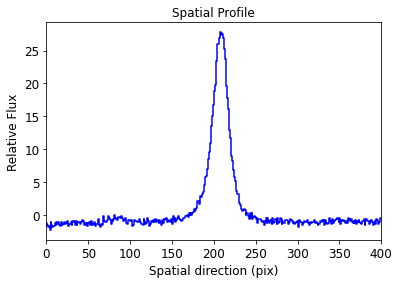


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 28, 210, 3, 4

amplitude=28.000000, x_0=210.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-1.03558813)>

    [1]: <Moffat1D(amplitude=29.21745159, x_0=208.60081574, gamma=15.71792865, alpha=1.86829549)>
Parameters:
            c0_0           amplitude_1     ...      alpha_1      
    ------------------- ------------------ ... ------------------
    -1.0355881275961523 29.217451

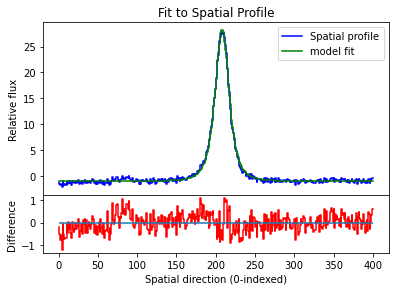

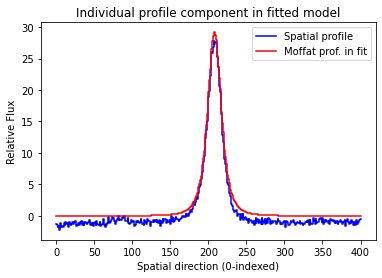


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 25.565819


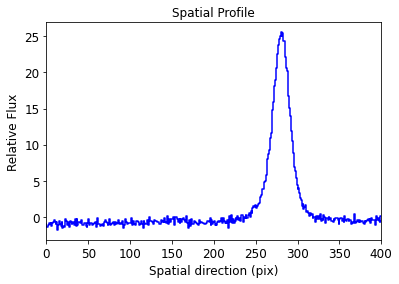


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 26, 285, 3, 4

amplitude=26.000000, x_0=285.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-0.74071734)>

    [1]: <Moffat1D(amplitude=26.48329621, x_0=281.09977171, gamma=17.53234129, alpha=1.92660271)>
Parameters:
            c0_0           amplitude_1     ...      alpha_1      
    ------------------- ------------------ ... ------------------
    -0.7407173447025199 26.483296

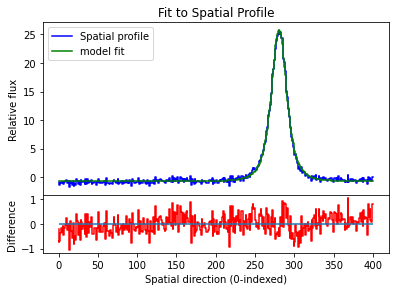

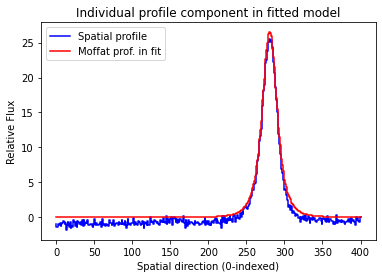


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 29.625160


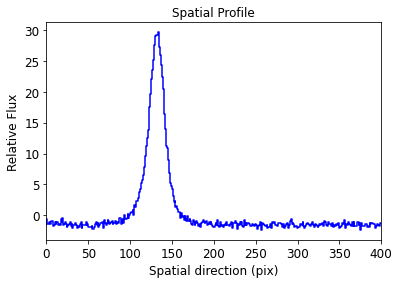


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 28, 135, 3, 4

amplitude=28.000000, x_0=135.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-1.50168494)>

    [1]: <Moffat1D(amplitude=31.06964904, x_0=132.51207364, gamma=16.55668038, alpha=2.03267373)>
Parameters:
            c0_0           amplitude_1     ...      gamma_1           alpha_1      
    ------------------- ------------------ ... ----------------- ----------------

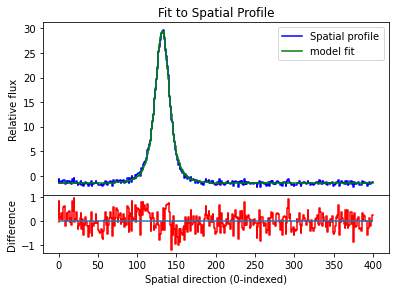

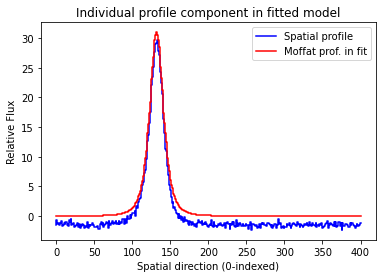


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 14.520052


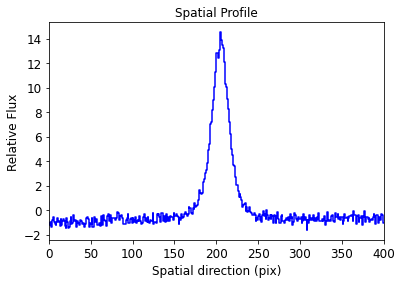


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 13, 205, 3, 4

amplitude=13.000000, x_0=205.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-0.7865317)>

    [1]: <Moffat1D(amplitude=14.64024227, x_0=205.44950589, gamma=-17.55438449, alpha=1.9213604)>
Parameters:
           c0_0           amplitude_1     ...      gamma_1            alpha_1      
    ------------------ ------------------ ... ------------------ -----------------

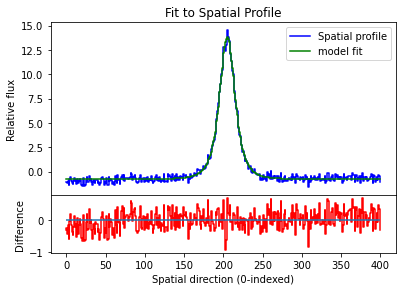

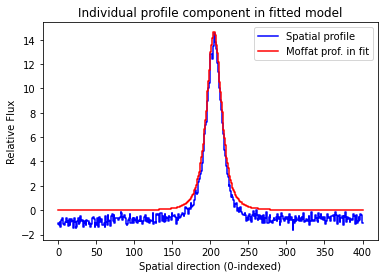


Do you want to start over ? : type yes/no
no


In [34]:
pix_range = [[1700, 2100], [1700, 2100], [1700, 2100], [1700, 2100]] 
           # pixrange for order 5 and 6 [2000, 2300], [1700, 2100], 
spec_list = [specb2, specb3, specb4, specb5]
#order_list = spec1.ordinfo


for i,sp in enumerate(spec_list):
    profile = sp.spatial_profile(pixrange=pix_range[i])
    plt.show()
    sp.initial_model()

Profile max value (before normalization) 27.773132


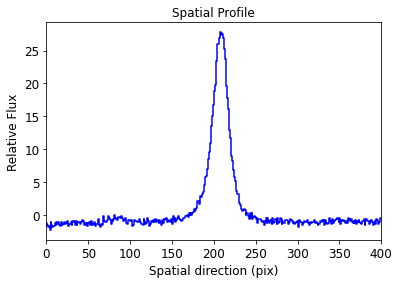

Profile max value (before normalization) 25.565819


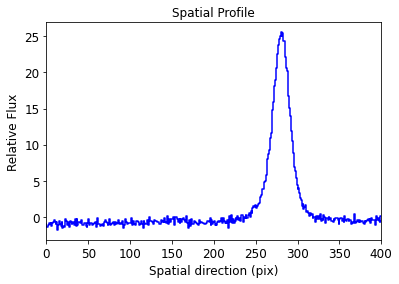

Profile max value (before normalization) 29.625160


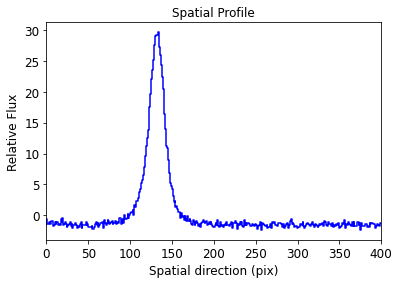

Profile max value (before normalization) 14.520052


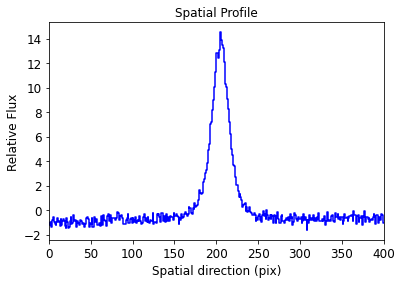

In [37]:
for i,sp in enumerate(spec_list):
    profile = sp.spatial_profile(pixrange=pix_range[i])
    plt.show()
    #sp.initial_model()

In [36]:
for i,sp in enumerate(spec_list):
    if i==0:
        print(sp.mod0.x_0_1.value)
        cen1 = sp.mod0.x_0_1.value

    else:
        print(cen1 - sp.mod0.x_0_1.value)

208.60081574111447
-72.49895597083432
76.08874210308855
3.1513098492934546


In [38]:
shifted_sp = []
shifted_var = []
shift_pixel = np.array([0.0, -72.49, 76.09, 3.15])

for i, sp in enumerate(spec_list):
    #print(sp[order-1].mod0, shift[i])
    nanmask = (sp.vardata <= 0) | (np.isnan(sp.vardata)) 
    nnan = nanmask.sum()
    if nnan > 0:
        print('Found %d NaNs in the two-dimensional variance '\
              'spectrum' % nnan)

        """ Replace the NaNs with a big value """
        sp.vardata[nanmask] = 1.e5
    shifted_sp.append(shift(sp.data, [shift_pixel[i], 0], order=1))
    shifted_var.append(shift(sp.vardata, [shift_pixel[i], 0], order=1))

Found 5 NaNs in the two-dimensional variance spectrum
Found 4 NaNs in the two-dimensional variance spectrum
Found 225 NaNs in the two-dimensional variance spectrum


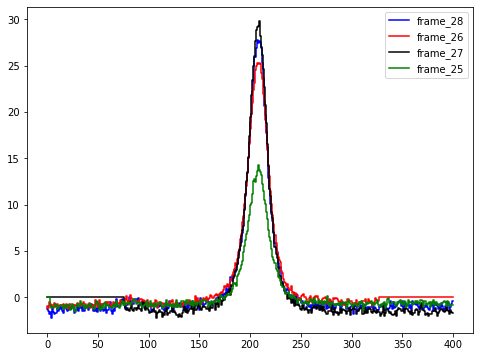

In [39]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g']
label = ['frame_28','frame_26', 'frame_27', 'frame_25']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1

In [40]:
wtsp = np.zeros(shifted_sp[0].shape)
wtsum = np.zeros(shifted_sp[0].shape)
use_frame = [0, 1, 2]
i = 0
for s, v in zip(shifted_sp, shifted_var):
    if i in use_frame:
        wt = np.zeros(wtsp.shape)
        mask = np.isnan(v) | (v<=0)
        wt[~mask] = 1.0 / v[~mask]
        #print(sum(sum(np.isnan(wt) | (wt<=0))))
        wtsp += wt * s
        #print(sum(sum(wtsp==0)))
        wtsum += wt
    #print(sum(sum(wtsum==0)))
    i +=1

wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

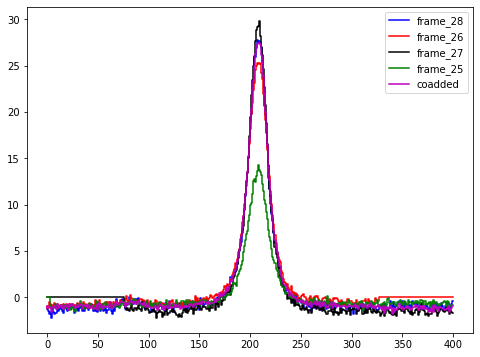

In [43]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g']
label = ['frame_28','frame_26', 'frame_27', 'frame_25']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

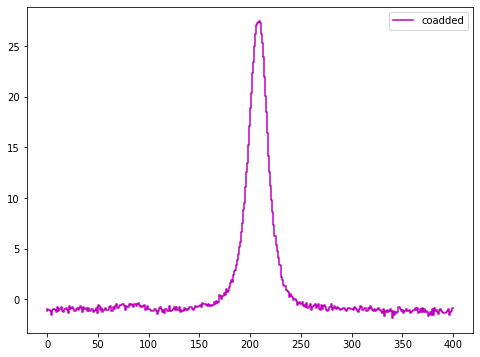

In [44]:
plt.figure(figsize=(8, 6))
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

In [45]:
s = fits.open(spec2d_file_list_blue[1])
file_name1 = 'J2017_LRIS_spectra/J2017_coadd2d_sp_blue'  + '.fits'
file_name2 = 'J2017_LRIS_spectra/J2017_coadd2d_var_blue' + '.fits'
fits.writeto(file_name1, outsp, header=s[0].header)
fits.writeto(file_name2, outvar, header=s[0].header)

## Coadd redside data

In [46]:
r_trim = [600, 1100]
specr1 = spec2d.Spec2d(spec2d_file_list_red[0], varext=1, ytrim=r_trim)
specr2 = spec2d.Spec2d(spec2d_file_list_red[1], varext=1, ytrim=r_trim)
specr3 = spec2d.Spec2d(spec2d_file_list_red[2], varext=1, ytrim=r_trim)
specr4 = spec2d.Spec2d(spec2d_file_list_red[3], varext=1, ytrim=r_trim)
specr5 = spec2d.Spec2d(spec2d_file_list_red[4], varext=1, ytrim=r_trim)


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00035.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00035.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4128.  yrange: 600:1101
Final data dimensions (x y): 4128 x 501

Dispersion axis:              x
N_pixels along dispersion axis: 4128


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00027.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07172023/spredux2d/szfpr230717_00027.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4128.  yrange: 600:1101
Final data dimensions (x y): 4128 x 501

Dispersion axis:              x
N_pixels along dispersion axis: 4128


Loading

Profile max value (before normalization) 114.220917


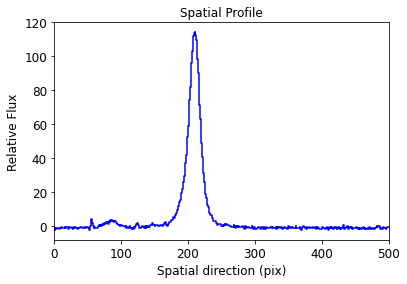


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 110, 205, 3, 4

amplitude=110.000000, x_0=205.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 10, 90, 2, 3

amplitude=10.000000, x_0=90.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.9618181)>

    [1]: <Moffat1D(amplitude=116.3710301, x_0=210.23449149, gamma=13.75731068, alpha=1.76688774)>

    [2]: <Moffat1D(amplitude=4.55572939, x_0=86.757917

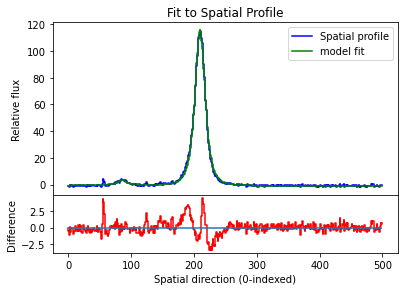

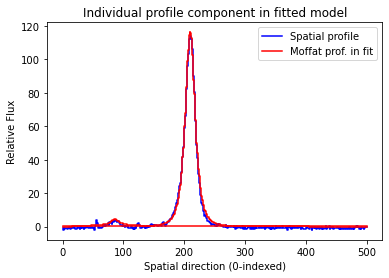


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 110.248756


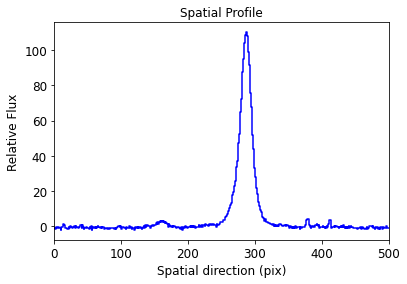


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 110, 290, 3, 4

amplitude=110.000000, x_0=290.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 10, 160, 2, 3

amplitude=10.000000, x_0=160.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.69251064)>

    [1]: <Moffat1D(amplitude=120.38978508, x_0=288.89507192, gamma=6.28827968, alpha=0.76397404)>

    [2]: <Moffat1D(amplitude=4.12789486, x_0=160.05

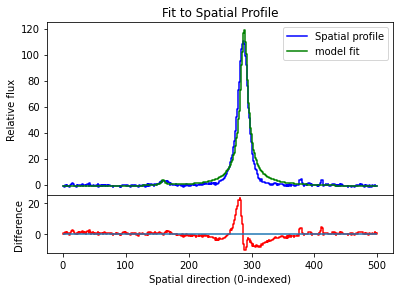

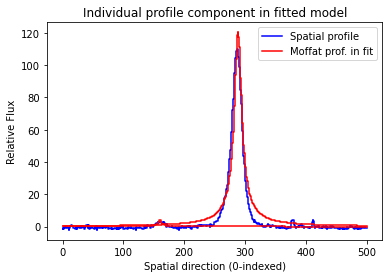


Do you want to start over ? : type yes/no
yes
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 105, 285, 3, 4

amplitude=105.000000, x_0=285.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 10, 160, 2, 3

amplitude=10.000000, x_0=160.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.50213835)>

    [1]: <Moffat1D(amplitude=111.36045533, x_0=287.00028713, gamma=14.08773788, alpha=1.83387438)>

    [2]: <Moffat1D(amplitude=3.20202195, x_0=161.34938913, gamma=30.92946764, alpha=5.69655977)>
Parameters:
            c0_0           amplitude_1

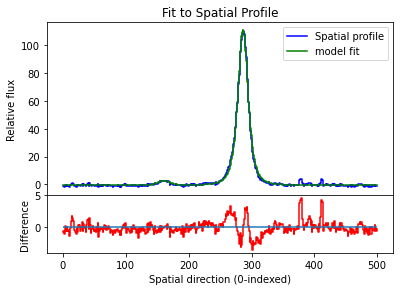

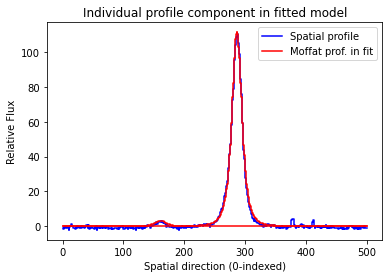


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 53.709827


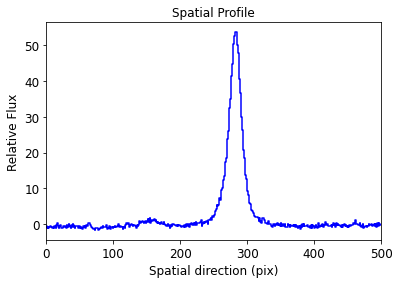


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 50, 285, 3, 4

amplitude=50.000000, x_0=285.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 3, 155, 2, 3

amplitude=3.000000, x_0=155.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.41458957)>

    [1]: <Moffat1D(amplitude=54.39185047, x_0=282.64820138, gamma=13.13998524, alpha=1.42604584)>

    [2]: <Moffat1D(amplitude=1.47294656, x_0=156.733179

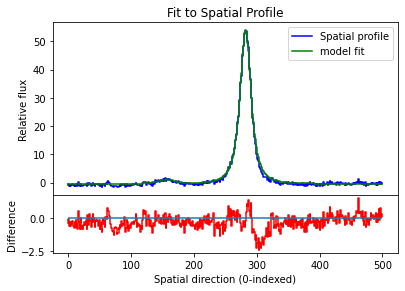

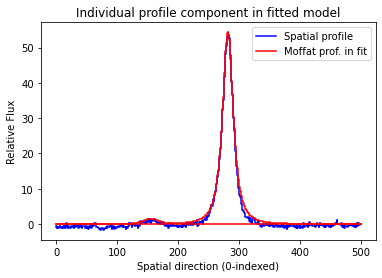


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 98.443176


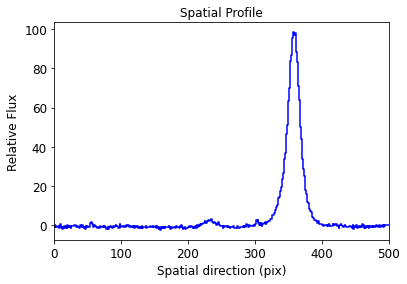


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 90, 355, 3, 4

amplitude=90.000000, x_0=355.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 8, 220, 2, 3

amplitude=8.000000, x_0=220.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.84162992)>

    [1]: <Moffat1D(amplitude=104.72866834, x_0=357.88867397, gamma=8.202628, alpha=0.86715201)>

    [2]: <Moffat1D(amplitude=2.01048207, x_0=220.05563968

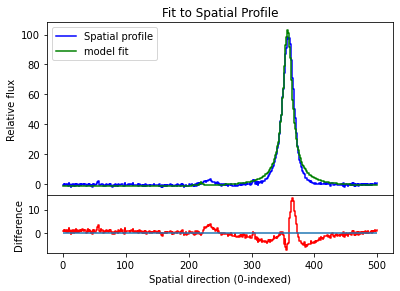

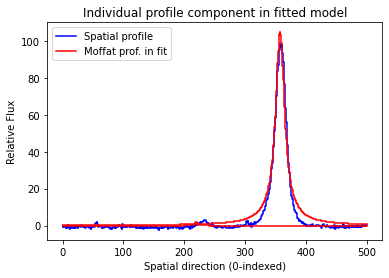


Do you want to start over ? : type yes/no
yes
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 90, 360, 3, 4

amplitude=90.000000, x_0=360.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 5, 220, 2, 3

amplitude=5.000000, x_0=220.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.49559739)>

    [1]: <Moffat1D(amplitude=104.63971551, x_0=359.16686837, gamma=9.01934725, alpha=0.98307783)>

    [2]: <Moffat1D(amplitude=2.03760722, x_0=220.21899047, gamma=3.22396209, alpha=0.39217386)>
Parameters:
            c0_0           amplitude_1     

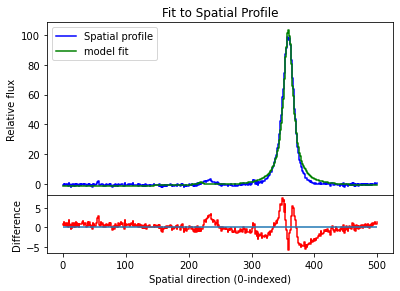

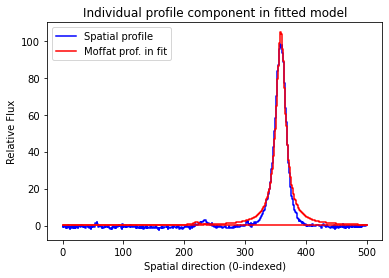


Do you want to start over ? : type yes/no
no


In [49]:
pix_range = [[1700, 2100], [1700, 2100], [1700, 2100], [1700, 2100]] 
           # pixrange for order 5 and 6 [2000, 2300], [1700, 2100], 
spec_list = [specr2, specr3, specr4, specr5]
#order_list = spec1.ordinfo


for i,sp in enumerate(spec_list):
    profile = sp.spatial_profile(pixrange=pix_range[i])
    plt.show()
    sp.initial_model()

In [50]:
for i,sp in enumerate(spec_list):
    if i==0:
        print(sp.mod0.x_0_1.value)
        print(sp.mod0.x_0_2.value)
        cen1 = sp.mod0.x_0_1.value
        cen2 = sp.mod0.x_0_2.value

    else:
        print(cen1 - sp.mod0.x_0_1.value)
        print(cen2 - sp.mod0.x_0_2.value)

210.23449148951738
86.7579172349602
-76.7657956444117
-74.59147189052975
-72.41370989503912
-69.97526251775584
-148.93237687926666
-133.46107323735202


In [51]:
shifted_sp = []
shifted_var = []
shift_pixel = np.array([0.0, -76.76, -72.41, -148.93])

for i, sp in enumerate(spec_list):
    #print(sp[order-1].mod0, shift[i])
    nanmask = (sp.vardata <= 0) | (np.isnan(sp.vardata)) 
    nnan = nanmask.sum()
    if nnan > 0:
        print('Found %d NaNs in the two-dimensional variance '\
              'spectrum' % nnan)

        """ Replace the NaNs with a big value """
        sp.vardata[nanmask] = 1.e5
    shifted_sp.append(shift(sp.data, [shift_pixel[i], 0], order=1))
    shifted_var.append(shift(sp.vardata, [shift_pixel[i], 0], order=1))

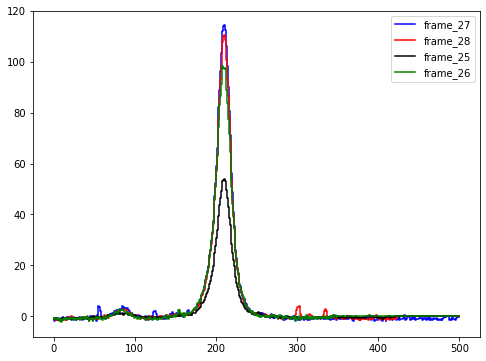

In [52]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g']
label = ['frame_27','frame_28', 'frame_25', 'frame_26']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1

In [53]:
wtsp = np.zeros(shifted_sp[0].shape)
wtsum = np.zeros(shifted_sp[0].shape)
use_frame = [0, 1, 3]
i = 0
for s, v in zip(shifted_sp, shifted_var):
    if i in use_frame:
        wt = np.zeros(wtsp.shape)
        mask = np.isnan(v) | (v<=0)
        wt[~mask] = 1.0 / v[~mask]
        #print(sum(sum(np.isnan(wt) | (wt<=0))))
        wtsp += wt * s
        #print(sum(sum(wtsp==0)))
        wtsum += wt
    #print(sum(sum(wtsum==0)))
    i +=1

wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

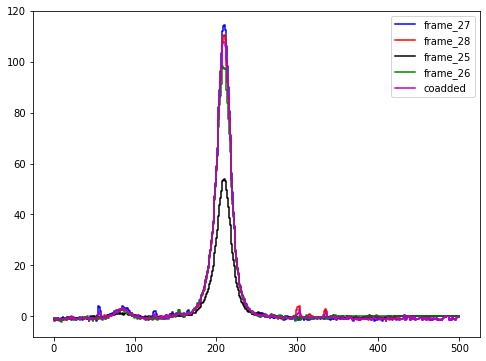

In [55]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g']
label = ['frame_27','frame_28', 'frame_25', 'frame_26']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

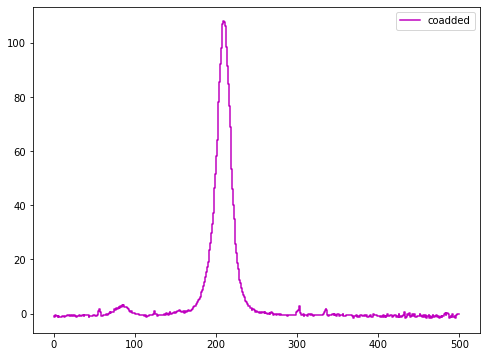

In [56]:
plt.figure(figsize=(8, 6))
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

In [57]:
s = fits.open(spec2d_file_list_red[1])
file_name1 = 'J2017_LRIS_spectra/J2017_coadd2d_sp_red'  + '.fits'
file_name2 = 'J2017_LRIS_spectra/J2017_coadd2d_var_red' + '.fits'
fits.writeto(file_name1, outsp, header=s[0].header)
fits.writeto(file_name2, outvar, header=s[0].header)